# Obsah

> ## Úvod

> ## Knižnice

> ## Dataset

> ## Chýbajúce hodnoty

>> ### Zjednotenie formátov dát

>> ### Odvodenie chýbajúcich hodnôt po riadkoch

>> ### Doplnenie chýbajúcich hodnôt po stĺpcoch

> ## Vychýlené hodnoty

> ## Normalizácia údajov

> ## Transformácia numerických atribútov na kategorické

> ## Transformacia kategorických údajov na numerické

> ## Vytváranie atribútov kombinovanim

> ## Zdroje

## Doležité parametre
DecisionTreeClassifier(
criterion

max_depth=None

min_samples_leaf - počet pozorovani vo vyslednej podmnozine

class_weight=None

# Úvod
Na základe identifikovaných problémov v dátach a návrhu ich riešenia v predchádzajúcej fáze treba zrealizovať predspracovanie. Výsledkom by mala byť upravená dátová sada (vo formáte ​csv​) vo vhodnom tvare pre zvolený algoritmus strojového učenia (v našom prípade rozhodovacie stromy​). Zároveň, keďže predspracovaním sa mohol zmeniť tvar a charakteristiky dát (počet atribútov, distribúcie hodnôt a pod.), treba znovu zrealizovať podstatné časti prieskumnej analýzy, pričom v tejto fáze je potrebné zamerať sa aj na vzťahy medzi jednotlivými atribútmi.

# Knižnice

In [491]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn import preprocessing

#Nastavenie rozmerov zobrazovaných grafov
plt.rcParams['figure.figsize'] = 9, 6
from IPython.display import Image

# Dataset

In [492]:
file_path = "data/zadanie4/train.csv"
# Načítame si súbor s datasetom so separátom ',' a ako index nastavime prvý stĺpec
train_data = pd.read_csv(file_path, sep=',', index_col=0)
# Pomenujeme si index
train_data.index.name = 'id'
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 0 to 2799
Data columns (total 39 columns):
age                          2799 non-null float64
sex                          2800 non-null object
on thyroxine                 2800 non-null object
query on thyroxine           2800 non-null object
on antithyroid medication    2800 non-null object
sick                         2800 non-null object
pregnant                     2800 non-null object
thyroid surgery              2800 non-null object
I131 treatment               2800 non-null object
query hypothyroid            2800 non-null object
query hyperthyroid           2800 non-null object
lithium                      2800 non-null object
goitre                       2800 non-null object
tumor                        2800 non-null object
hypopituitary                2800 non-null object
psych                        2800 non-null object
TSH measured                 2800 non-null object
TSH                          2516 non-null

In [493]:
file_path = "data/zadanie4/test.csv"
# Načítame si súbor s datasetom so separátom ',' a ako index nastavime prvý stĺpec
test_data = pd.read_csv(file_path, sep=',', index_col=0)
# Pomenujeme si index
test_data.index.name = 'id'
test_data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,class,fnlwgt,education,education-num,relationship,capital-gain,capital-loss,hours-per-week,date_of_birth,personal_info
id,,,,,,,,,,,,,,,,,,,,,
0,68,M,f,f,f,f,f,f,f,f,...,negative.|1231,96245,HS-grad,9,Husband,0.0,0,99,1949-07-30,Sales|United-States\nMarried-civ-spouse -- Sel...
1,42,F,f,f,f,f,f,f,f,f,...,negative.|329,191177,HS-grad,9,Not-in-family,NaN,0,55,1975-10-31,Exec-managerial|United-States\nNever-married -...
2,27,F,f,f,f,f,f,f,f,f,...,negative.|2518,48585,Some-college,1000,Wife,0.0,0,4,1990-10-29 00:00:00,Prof-specialty|United-States\nMarried-civ-spou...
3,32,F,FALSE,f,f,f,f,f,f,f,...,negative.|821,251526,Some-college,10,Wife,0.0,0,20,1985-10-28,Tech-support|United-States\nMarried-civ-spouse...
4,23,F,f,f,f,f,f,f,f,f,...,negative.|951,175614,10th,6,Unmarried,0.0,0,40,??,Other-service|United-States\nNever-married -- ...


In [494]:
#Aby sme mohli pracovat 
data = train_data

# Chýbajúce hodnoty

### Zjednotenie formátov dát

Zmena hodnôt **M -> Male** a **F -> Female**. Takisto zmenilo ja hodnoty **? -> NaN**, ale to nám nevadí. Túto úpravu robíme kvôli tomu, aby sme pri upravovaní hodnôt F, f, T, t ... mohli upraviť tieto hodnoty globálne.

In [495]:
data['sex'].value_counts()

F    1830
M     860
?     110
Name: sex, dtype: int64

In [496]:
data['sex'].replace(['F', 'M'], ['Female', 'Male'], inplace=True)

In [497]:
data['sex'].value_counts()

Female    1830
Male       860
?          110
Name: sex, dtype: int64

Zmena hodnôt **f, F, FALSE -> False** a **t, T, TRUE -> True**

In [498]:
data.replace(['f', 'F', 'FALSE', 't', 'T', 'TRUE'], [False, False, False, True, True, True], inplace=True)
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,class,fnlwgt,education,education-num,relationship,capital-gain,capital-loss,hours-per-week,date_of_birth,personal_info
id,,,,,,,,,,,,,,,,,,,,,
0,72.0,Female,True,False,False,False,False,False,False,False,...,replacement therapy.|3560,140581,Some-college,1000,Unmarried,0.0,0,40,1946-02-03,Other-service|United-States\nWidowed -- privat...
1,52.0,Female,False,False,False,False,False,False,False,False,...,negative.|311,180916,Some-college,10,Unmarried,0.0,0,38,1965-08-27,Adm-clerical|United-States\nSeparated -- Local...
2,62.0,Male,False,False,False,False,False,False,False,False,...,negative.|3705,235853,HS-grad,-900,Husband,0.0,0,45,1955-04-15,Sales|United-States\nMarried-civ-spouse -- pri...
3,23.0,Female,False,False,False,False,False,False,False,False,...,negative.|2668,121889,Some-college,10,Own-child,0.0,0,20,1994-03-26,Sales|United-States\nNever-married -- Private|...
4,63.0,Female,True,False,False,False,False,False,False,False,...,replacement therapy.|1668,222490,Assoc-voc,11,Own_child,0.0,0,40,1955-01-21,Adm-clerical|United-States\nNever-married -- P...


Ujednotenie názvov v stĺpci **relationship**. 
Own-child -> Own_child
Not-in-family -> Not_in_family
Other-relative -> Other_relative

In [499]:
data['relationship'].value_counts()

 Not-in-family     809
 Husband           550
 Unmarried         510
 Own-child         441
 Wife              253
 Not_in_family      95
 Other-relative     80
 Own_child          53
 Other_relative      9
Name: relationship, dtype: int64

In [500]:
data['relationship'] = data['relationship'].apply(str.strip)

'''data['relationship'] = data['relationship'].map({
    'Own-child': 'Own_child', 
    'Not-in-family': 'Not_in_family', 
    'Other-relative': 'Other_relative',
    'Unmarried': 'Unmarried',
    'Wife': 'Wife',
    'Husband': 'Husband'
})'''

data['relationship'].replace(['Own-child', 'Not-in-family', 'Other-relative'], ['Own_child', 'Not_in_family', 'Other_relative'], inplace=True)

In [501]:
data['relationship'].value_counts()

Not_in_family     904
Husband           550
Unmarried         510
Own_child         494
Wife              253
Other_relative     89
Name: relationship, dtype: int64

Ujednotenie formátu atribútu **date_of_birth**

In [502]:
data['date_of_birth'].head(30)

id
0              1946-02-03
1              1965-08-27
2              1955-04-15
3              1994-03-26
4              1955-01-21
5              1961-12-10
6              1934-03-03
7              1949-07-21
8              1999-01-06
9              1945-11-10
10             1999-09-20
11                    NaN
12                    NaN
13             1970-09-28
14             1942-08-15
15             07/07/1973
16             1979-12-04
17             18/01/1940
18             15/10/1952
19             1981-07-19
20             1940-05-20
21             1957-04-28
22             1998-03-25
23             1935-11-23
24             1948-08-21
25             24/01/1942
26             1987-07-21
27    1983-09-21 00 00 00
28    1953-06-10 00:00:00
29             1935-08-10
Name: date_of_birth, dtype: object

In [503]:
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'], errors='coerce')

In [504]:
data['date_of_birth'].head(30)

id
0    1946-02-03
1    1965-08-27
2    1955-04-15
3    1994-03-26
4    1955-01-21
5    1961-12-10
6    1934-03-03
7    1949-07-21
8    1999-01-06
9    1945-11-10
10   1999-09-20
11          NaT
12          NaT
13   1970-09-28
14   1942-08-15
15   1973-07-07
16   1979-12-04
17   1940-01-18
18   1952-10-15
19   1981-07-19
20   1940-05-20
21   1957-04-28
22   1998-03-25
23   1935-11-23
24   1948-08-21
25   1942-01-24
26   1987-07-21
27          NaT
28   1953-06-10
29   1935-08-10
Name: date_of_birth, dtype: datetime64[ns]

Vidíme, že riadky, kde bolo **00 00 00** nám zmenilo na NaT. To znamená že v tomto riadku sa nachádza hodnota, ktorá sa nedala sparsovať. 

Rozdelenie stĺpca **personal_info** do viacerých stĺpcov

In [505]:
df_personal_data = pd.DataFrame(data['personal_info'].str.replace('\n','|').str.replace('--','|').str.split('|', expand=False).tolist(), columns=['job','state', 'parents_definition', 'segment', 'race'])

Atribút je teraz rozdelený do viacerých stĺpcov **job, state, parents_definition, segment, race**, ale je potrebné v nich urobiť nejaké úpravy. 

In [506]:
df_personal_data.head()

,job,state,parents_definition,segment,race
0,Other-service,United-States,Widowed,private,Black
1,Adm-clerical,United-States,Separated,Local-gov,White
2,Sales,United-States,Married-civ-spouse,private,White
3,Sales,United-States,Never-married,Private,Black
4,Adm-clerical,United-States,Never-married,Private,White


In [507]:
df_personal_data['job'].value_counts()

Adm-clerical         430
Other-service        400
Prof-specialty       382
Exec-managerial      355
Sales                316
Craft-repair         202
?                    201
Machine-op-inspct    160
Tech-support          84
Transport-moving      74
Handlers-cleaners     60
Farming-fishing       56
Protective-serv       51
Priv-house-serv       29
Name: job, dtype: int64

In [508]:
for col in df_personal_data.columns:
    df_personal_data[col] = df_personal_data[col].str.replace('-','_')

df_personal_data.head()

,job,state,parents_definition,segment,race
0,Other_service,United_States,Widowed,private,Black
1,Adm_clerical,United_States,Separated,Local_gov,White
2,Sales,United_States,Married_civ_spouse,private,White
3,Sales,United_States,Never_married,Private,Black
4,Adm_clerical,United_States,Never_married,Private,White


Teraz môžeme vytvorené stĺpce z atribútu **personal_info** pripojiť k celému datasetu a vymazať atribút **personal_info**.

In [509]:
data = data.drop(['personal_info'], axis=1) # vymazanie atribútu personal_info
data = data.join(df_personal_data)          # pridanie nových atribútov do nášho datasetu

Rozdelenie atribútu **class** do dvoch nových atribútov.

In [513]:
data['class'].head()

id
0    replacement therapy.|3560
1                negative.|311
2               negative.|3705
3               negative.|2668
4    replacement therapy.|1668
Name: class, dtype: object

In [516]:
df_class = pd.DataFrame(data['class'].str.replace('\n','|').str.replace('--','|').str.split('|', expand=False).tolist(), columns=['unknown_1','unknown_2'])
df_class.head()

,unknown_1,unknown_2
0,replacement therapy.,3560
1,negative.,311
2,negative.,3705
3,negative.,2668
4,replacement therapy.,1668


Keď už je atribút class rozdelený do dvoch separátnych atribútov, musíme v ních spraviť menšie korekcie - len odstránime bodku z hodnôt atribútu **unknown_1**.

In [522]:
df_class['unknown_1'].head()

0    replacement therapy.
1               negative.
2               negative.
3               negative.
4    replacement therapy.
Name: unknown_1, dtype: object

In [526]:
df_class['unknown_1'] = df_class['unknown_1'].str.replace('.','')

In [527]:
df_class['unknown_1'].head()

0    replacement therapy
1               negative
2               negative
3               negative
4    replacement therapy
Name: unknown_1, dtype: object

In [528]:
data = data.drop(['class'], axis=1) # vymazanie atribútu class
data = data.join(df_class)          # pridanie nových atribútov do nášho datasetu

In [529]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,capital-loss,hours-per-week,date_of_birth,job,state,parents_definition,segment,race,unknown_1,unknown_2
id,,,,,,,,,,,,,,,,,,,,,
0,72.0,Female,True,False,False,False,False,False,False,False,...,0,40,1946-02-03,Other_service,United_States,Widowed,private,Black,replacement therapy,3560
1,52.0,Female,False,False,False,False,False,False,False,False,...,0,38,1965-08-27,Adm_clerical,United_States,Separated,Local_gov,White,negative,311
2,62.0,Male,False,False,False,False,False,False,False,False,...,0,45,1955-04-15,Sales,United_States,Married_civ_spouse,private,White,negative,3705
3,23.0,Female,False,False,False,False,False,False,False,False,...,0,20,1994-03-26,Sales,United_States,Never_married,Private,Black,negative,2668
4,63.0,Female,True,False,False,False,False,False,False,False,...,0,40,1955-01-21,Adm_clerical,United_States,Never_married,Private,White,replacement therapy,1668


### Odvodenie chýbajúcich hodnôt po riadkoch

### Doplnenie chýbajúcich hodnôt po stĺpcoch

# Vychýlené hodnoty TODO:

# Pomocné grafové examples

- data.fillna((0: 1, 1:1, 2:1))
- data.isnull().sum()
- data.dropna(how='all')
- data.plot.box()

In [5]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()
    
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))

df = df.cumsum()
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()

df3['A'] = pd.Series(list(range(len(df))))
df3.head()

,B,C,A
0,-0.827785,0.263023,0
1,-0.684248,1.299199,1
2,-0.032819,2.383927,2
3,-0.853502,1.423577,3
4,-1.883528,1.086924,4


In [6]:
df.head(2)#.plot.hist(); plt.axhline(0, color='g')


,A,B,C,D
2000-01-01,0.494469,-0.090924,0.060915,0.093378
2000-01-02,1.293555,-1.136438,-0.134092,-0.456719


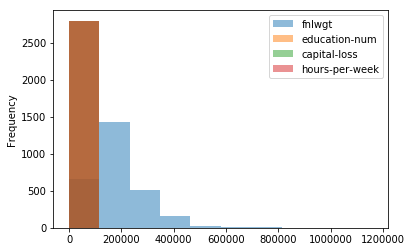

In [7]:
data.select_dtypes('int').plot.hist(alpha=0.5)

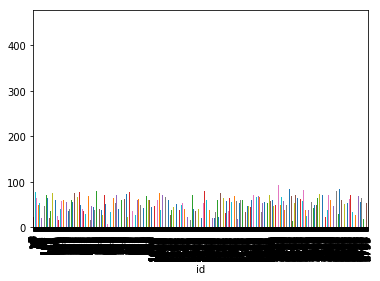

In [8]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

#df2.plot.bar(stacked=True);
plt.figure()
data['age'].plot.bar()


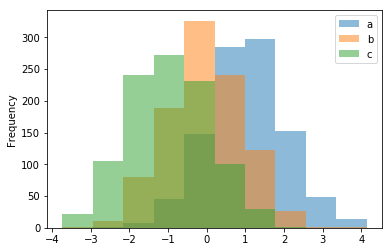

In [9]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
plt.figure();

df4.plot.hist(alpha=0.5)

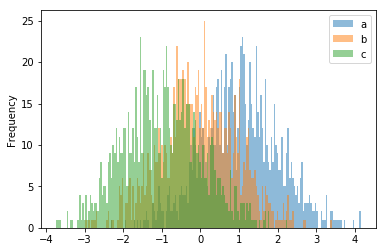

In [10]:
df4.plot.hist(alpha=0.5, bins=200)

In [11]:
plt.figure()
df['A'].head()

2000-01-01    0.494469
2000-01-02    1.293555
2000-01-03    1.966589
2000-01-04    0.788135
2000-01-05    0.330452
Freq: D, Name: A, dtype: float64

In [12]:
df['A'].diff().head()

2000-01-01         NaN
2000-01-02    0.799086
2000-01-03    0.673034
2000-01-04   -1.178453
2000-01-05   -0.457684
Freq: D, Name: A, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21560b38>,
      dtype=object)

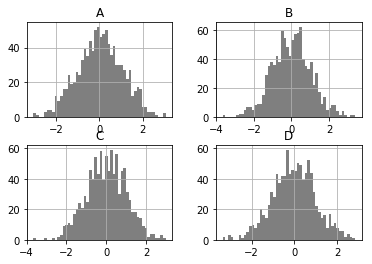

In [13]:
df.diff().hist(color='k', alpha=0.5, bins=50)

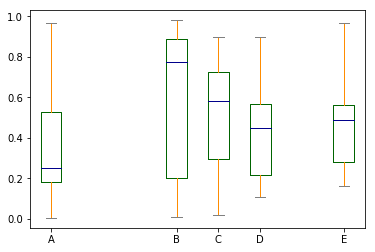

In [14]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
df.plot.box(color=color, sym='r+', positions=[1, 4, 5, 6, 8])

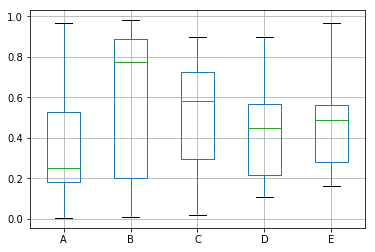

In [15]:
df.boxplot()

In [16]:
df = pd.DataFrame(np.random.rand(10,2), columns=['Col1', 'Col2'] )

df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])

plt.figure();
df
#bp = df.boxplot(by='X')

,Col1,Col2,X
0,0.387639,0.671481,A
1,0.062342,0.732109,A
2,0.200968,0.788282,A
3,0.698457,0.904472,A
4,0.175327,0.682591,A
5,0.039265,0.710539,B
6,0.229236,0.395627,B
7,0.017269,0.238105,B
8,0.497654,0.664592,B
9,0.467843,0.876673,B


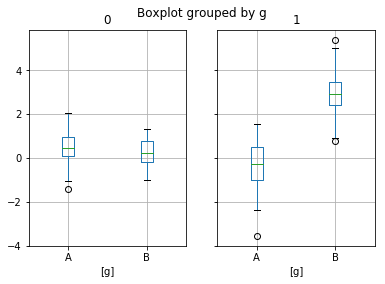

In [17]:
np.random.seed(1234)
df_box = pd.DataFrame(np.random.randn(50, 2))
df_box['g'] = np.random.choice(['A', 'B'], size=50)
df_box.loc[df_box['g'] == 'B', 1] += 3
bp = df_box.boxplot(by='g')

In [18]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

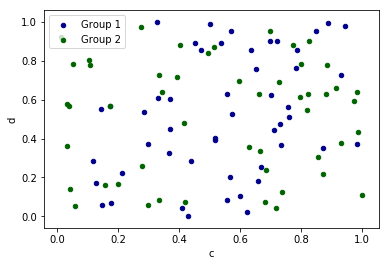

In [19]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');

df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);

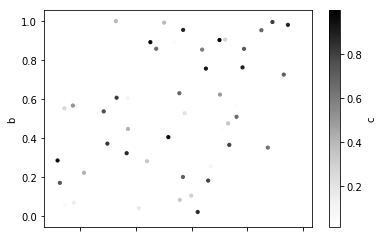

In [20]:
df.plot.scatter(x='a', y='b', c='c', s=10);

# Zdroje
Príklady ako pracovať s pandas - https://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook-plotting

Robenie grafov v pandas - https://pandas.pydata.org/pandas-docs/stable/visualization.html